In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import savgol_filter

## Trying to improve results

#### Taking means from multiple spectroscopy runs

In [2]:
#Initialising each variable
file_prefix = "I-V spectroscopy"
materials = ["Graphite", "Gold", "Silicon"]

#dictionary to hold material, mean current data frame pairs
mean_dfs = {}

#iterating over each material
for material in materials:
    #setting up data frame to hold each current value
    volt_column = False
    grand_df = pd.DataFrame({})

    #looping over 16 csv w/ the naming convention
    for i in range(1, 17):
        #storing raw spectroscopy data in data frame
        spectroscopy = pd.read_csv(f"Worthwhile Scans\\week 5\\Spectroscopy {material}\\{file_prefix} {i}.csv",
                               names=["Tip Voltage (mV)", "Current (nA)"],
                               sep=";")

        #if statement set up to only write voltage column once
        if volt_column == False:
            grand_df["Tip Voltage (mV)"] = spectroscopy["Tip Voltage (mV)"]
            volt_column = True

        #Writing current to big data frame
        grand_df[f"Current (nA) {i}"] = spectroscopy["Current (nA)"]

        #calculate mean current of all 16 current
        mean_df = pd.DataFrame({"Tip Voltage (mV)":grand_df["Tip Voltage (mV)"],
                           "Mean Current (nA)":grand_df.iloc[:, 1:].mean(axis=1)})
        mean_df.to_csv(f"I-V mean spectroscopy {material}.csv", index=False)

        #write data frame of voltage and current to dictionary
        mean_dfs[material] = mean_df

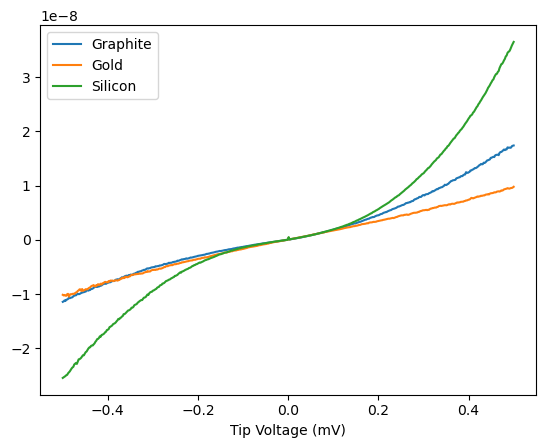

In [3]:
fig, ax = plt.subplots()
for mat, dfs in mean_dfs.items():
    dfs.plot("Tip Voltage (mV)", "Mean Current (nA)", ax = ax, label = mat)

### Running the data through a filter

The filter chosen was the _Savitzky-Golay_ filter due to its nature in fitting a polynomial to the data while being able to maintain the nuances of it. It also has various parameters that can be played around with to obtain more desirable results.

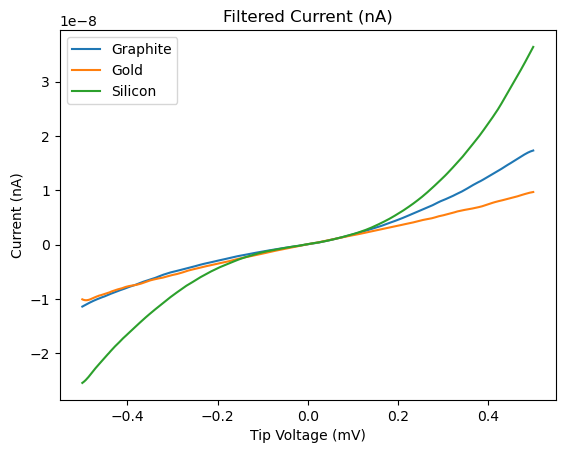

In [4]:
fig, ax = plt.subplots()
for mat, dfs in mean_dfs.items():
    spectroscopy_filtered = savgol_filter(dfs["Mean Current (nA)"], window_length = 25, polyorder = 3, mode = 'interp')
    ax.plot(dfs["Tip Voltage (mV)"], spectroscopy_filtered, label = mat)
    dfs["Filtered Current (nA)"] = spectroscopy_filtered
    dfs.to_csv(f"I-V mean and filter spectroscopy {mat}.csv", index=False)
ax.set_xlabel("Tip Voltage (mV)")
ax.set_ylabel("Current (nA)")
ax.set_title("Filtered Current (nA)")
plt.legend()

### Making all the plots.

,Tip Voltage (mV),Mean Current (nA),Filtered Current (nA)
0,-0.500000,-1.141834e-08,0.000000e+00
1,-0.498043,-1.134815e-08,9.000354e-11
2,-0.496086,-1.115074e-08,1.793950e-10
3,-0.494129,-1.126442e-08,2.680719e-10
4,-0.492172,-1.103077e-08,3.559315e-10
...,...,...,...
507,0.492172,1.695251e-08,2.851096e-08
508,0.494129,1.699562e-08,2.857841e-08
509,0.496086,1.725521e-08,2.863985e-08
510,0.498043,1.734161e-08,2.869484e-08


C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:1242: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:1243: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:1244: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:1250: RuntimeWarning: invalid value encountered in add
  out[tuple(slice1)] = a * f[tuple(slice2)] + b * f[tuple(slice3)] + c * f[tuple(slice4)]


,Tip Voltage (mV),Mean Current (nA),Filtered Current (nA),filtered d(ln(I))/d(ln(V)),filtered d(I)/d(V)
0,-0.500000,-1.141834e-08,0.000000e+00,-inf,4.599181e-08
1,-0.498043,-1.134815e-08,9.000354e-11,-inf,4.583543e-08
2,-0.496086,-1.115074e-08,1.793950e-10,-138.480137,4.549647e-08
3,-0.494129,-1.126442e-08,2.680719e-10,-86.559267,4.510508e-08
4,-0.492172,-1.103077e-08,3.559315e-10,-63.162174,4.466127e-08
...,...,...,...,...,...
507,0.492172,1.695251e-08,2.851096e-08,0.619402,3.588340e-08
508,0.494129,1.699562e-08,2.857841e-08,0.569349,3.293141e-08
509,0.496086,1.725521e-08,2.863985e-08,0.515235,2.974849e-08
510,0.498043,1.734161e-08,2.869484e-08,0.457013,2.633464e-08


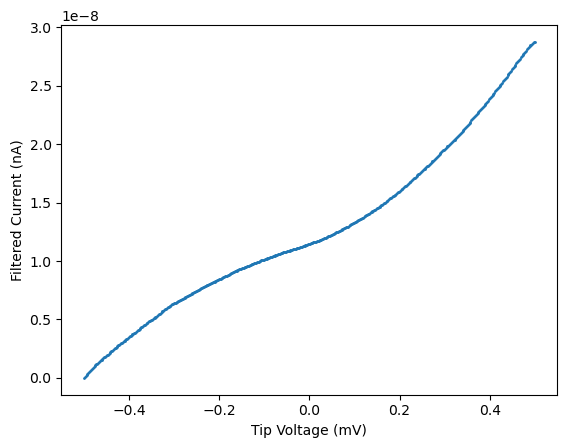

<Figure size 1000x600 with 0 Axes>

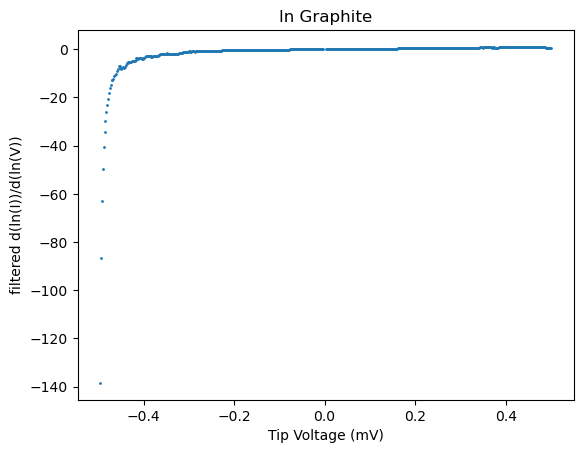

<Figure size 1000x600 with 0 Axes>

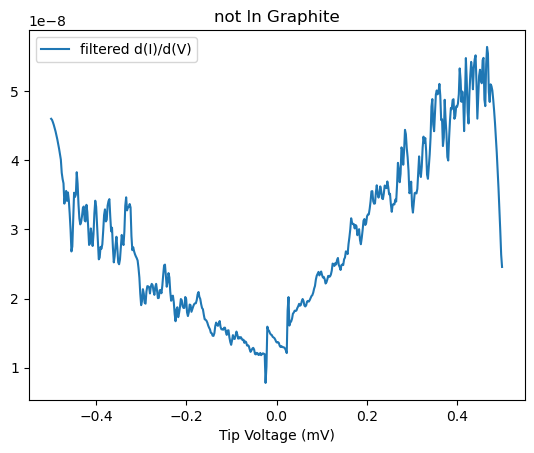

,Tip Voltage (mV),Mean Current (nA),Filtered Current (nA)
0,-0.500000,-1.012821e-08,0.000000e+00
1,-0.498043,-1.024265e-08,-7.552383e-11
2,-0.496086,-1.015205e-08,-1.278020e-10
3,-0.494129,-1.027756e-08,-1.586960e-10
4,-0.492172,-1.030178e-08,-1.700676e-10
...,...,...,...
507,0.492172,9.485245e-09,1.963564e-08
508,0.494129,9.551811e-09,1.967264e-08
509,0.496086,9.556389e-09,1.970657e-08
510,0.498043,9.649849e-09,1.973713e-08


C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:1242: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:1243: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:1244: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:1250: RuntimeWarning: invalid value encountered in add
  out[tuple(slice1)] = a * f[tuple(slice

,Tip Voltage (mV),Mean Current (nA),Filtered Current (nA),filtered d(ln(I))/d(ln(V)),filtered d(I)/d(V)
0,-0.500000,-1.012821e-08,0.000000e+00,NaN,-3.859268e-08
1,-0.498043,-1.024265e-08,-7.552383e-11,NaN,-3.265341e-08
2,-0.496086,-1.015205e-08,-1.278020e-10,NaN,-2.125050e-08
3,-0.494129,-1.027756e-08,-1.586960e-10,NaN,-1.079886e-08
4,-0.492172,-1.030178e-08,-1.700676e-10,NaN,-1.298483e-09
...,...,...,...,...,...
507,0.492172,9.485245e-09,1.963564e-08,0.491538,1.961177e-08
508,0.494129,9.551811e-09,1.967264e-08,0.455145,1.812226e-08
509,0.496086,9.556389e-09,1.970657e-08,0.414768,1.647828e-08
510,0.498043,9.649849e-09,1.973713e-08,0.370369,1.467982e-08


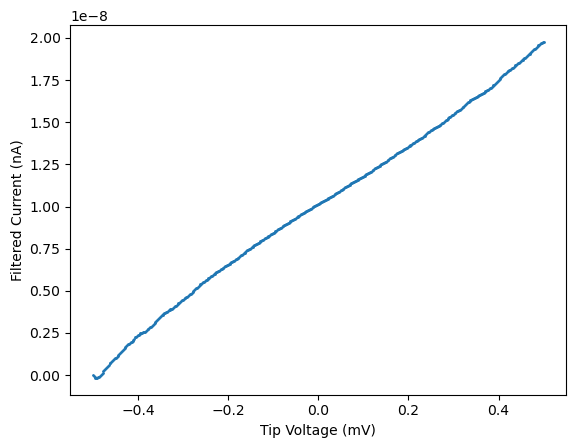

<Figure size 1000x600 with 0 Axes>

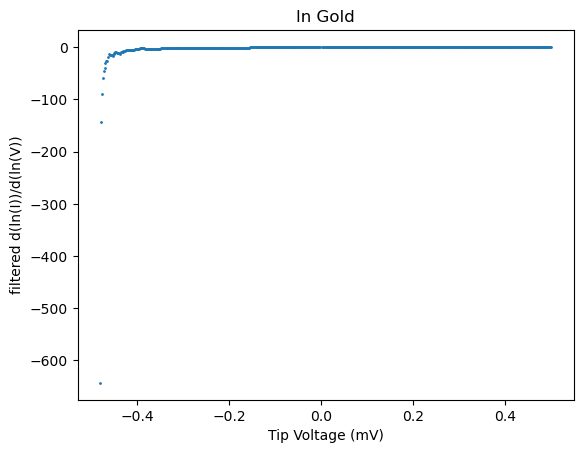

<Figure size 1000x600 with 0 Axes>

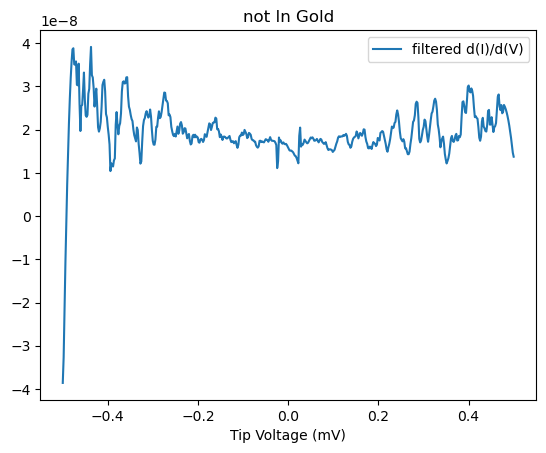

,Tip Voltage (mV),Mean Current (nA),Filtered Current (nA)
0,-0.500000,-2.543697e-08,0.000000e+00
1,-0.498043,-2.532959e-08,1.164241e-10
2,-0.496086,-2.523670e-08,2.484911e-10
3,-0.494129,-2.509518e-08,3.947848e-10
4,-0.492172,-2.493534e-08,5.538889e-10
...,...,...,...
507,0.492172,3.501740e-08,6.065916e-08
508,0.494129,3.541260e-08,6.096425e-08
509,0.496086,3.581448e-08,6.126974e-08
510,0.498043,3.614559e-08,6.157550e-08


C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:1242: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:1243: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:1244: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:1250: RuntimeWarning: invalid value encountered in add
  out[tuple(slice1)] = a * f[tuple(slice2)] + b * f[tuple(slice3)] + c * f[tuple(slice4)]


,Tip Voltage (mV),Mean Current (nA),Filtered Current (nA),filtered d(ln(I))/d(ln(V)),filtered d(I)/d(V)
0,-0.500000,-2.543697e-08,0.000000e+00,-inf,5.949270e-08
1,-0.498043,-2.532959e-08,1.164241e-10,-inf,6.348947e-08
2,-0.496086,-2.523670e-08,2.484911e-10,-154.922620,7.112115e-08
3,-0.494129,-2.509518e-08,3.947848e-10,-101.259030,7.802916e-08
4,-0.492172,-2.493534e-08,5.538889e-10,-76.363775,8.421347e-08
...,...,...,...,...,...
507,0.492172,3.501740e-08,6.065916e-08,1.263831,1.557644e-07
508,0.494129,3.541260e-08,6.096425e-08,1.264448,1.560039e-07
509,0.496086,3.581448e-08,6.126974e-08,1.264520,1.561760e-07
510,0.498043,3.614559e-08,6.157550e-08,1.264051,1.562807e-07


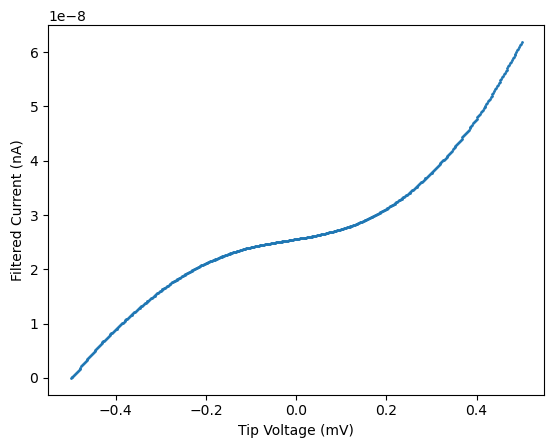

<Figure size 1000x600 with 0 Axes>

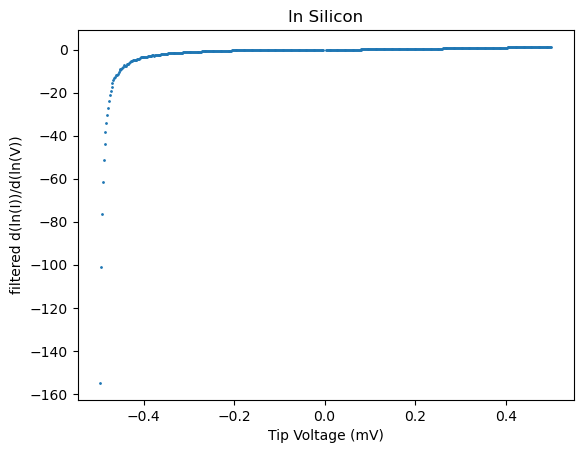

<Figure size 1000x600 with 0 Axes>

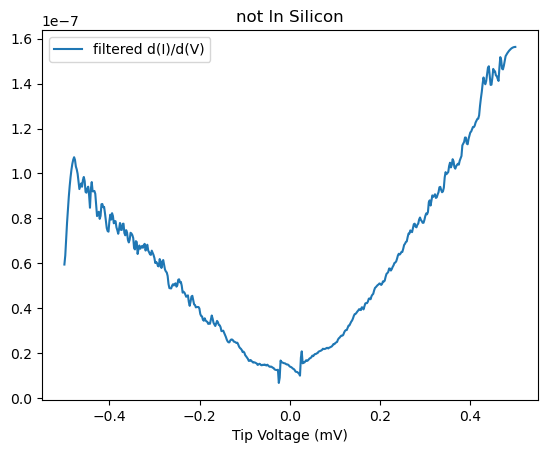

In [5]:
for mat, dfs in mean_dfs.items():
    # Calculate the logs and gradient
    
    dfs["Filtered Current (nA)"] = dfs["Filtered Current (nA)"] + np.abs(dfs["Filtered Current (nA)"][0])
    display(dfs)
    dfs.plot("Tip Voltage (mV)", "Filtered Current (nA)", kind = "scatter", s = 1)
    log_current = np.log((dfs["Filtered Current (nA)"]))
    log_voltage = np.log(np.abs(dfs["Tip Voltage (mV)"]))
    dfs["filtered d(ln(I))/d(ln(V))"] = np.gradient(log_current, log_voltage)
    dfs["filtered d(I)/d(V)"] = np.gradient(dfs["Filtered Current (nA)"], dfs["Tip Voltage (mV)"])

    # Plot the derivative with an increased figure size
    plt.figure(figsize=(10, 6))  # Set figure size (width, height)
    display(dfs)
    dfs.plot("Tip Voltage (mV)", "filtered d(ln(I))/d(ln(V))", kind = "scatter", s = 1)
    plt.title(f"ln {mat}")
    plt.show()

    #plot the derivative without natural logs with an increased figure size
    plt.figure(figsize=(10, 6))  # Set figure size (width, height)
    dfs.plot("Tip Voltage (mV)", "filtered d(I)/d(V)")
    plt.title(f"not ln {mat}")
    plt.show()